In [1]:
# Algo-W01-10 Group
# Algorithm Analysis Fall 2025 Group Project
# Comparative Analysis Graph Traversal Techniques: BFS vs DFS

In [6]:
### IMPORT MODULES
from collections import deque, defaultdict  # FIFO queue & dict for traversal
import matplotlib.pyplot as plt             # Data visualization
import numpy as np                          # Statistical analyses
import random                               # Randomized graph attributes
import time                                 # perf_counter() measuring

In [3]:
### LAYER: GRAPH GENERATION API (author: Joshua Gregory)
class RUNGraph:
  """ Creates simple, undirected, unweighted graphs.
  Graphs are populated randomly & represented as lists.
  Defines BFS & iDFS graph traversal techniques. """

  def __init__(self, edge_prob):
    """ RUNGraph constructor. """
    self.num_nodes = random.randint(250, 3001)  # number nodes over a wide range
    self.nodes = list(range(self.num_nodes))    # node value == index position
    self.edge_prob = edge_prob                  # 3%, 6%, or 15% edge chance
    self.edges = self.set_edges()               # set of graph adjacencies
    self.start_node = self.nodes[0]             # initial state = first node
    self.goal_node = self.set_goal_node()       # goal state = random node

  # Generate edges per edge probability
  def set_edges(self):
    """ Generate edges according to self.edge_prob.
    @Return: (set) generated edges. """
    edges = set()
    for i in range(self.num_nodes):
      for j in range(i + 1, self.num_nodes):
        if random.random() < self.edge_prob:  # create edge tuple & add to set
          edge = (min(self.nodes[i], self.nodes[j]), max(self.nodes[i], self.nodes[j]))
          edges.add(edge)
    return edges

  # Set goal node
  def set_goal_node(self):
    """ Defines goal state to a random node that is not the starting node.
    @Return: (integer) randomly chosen goal node value != start node (0). """
    return random.choice([node for node in self.nodes if node != self.start_node])

  # Get list of adjacencies per node
  def get_adj_list(self):
    """ Generate list of adjacencies from set of edges.
    @Return: (2d list) adjacent nodes per node. """
    adj = defaultdict(list)
    for u, v in self.edges:
      adj[u].append(v)  # add adj for u -> v
      adj[v].append(u)  # add adj for v -> u    *reverse per undirected graph
    return adj

  # Print object attributes
  def to_string(self):
    """ Prints attributes for graph object. """
    print("---------------------------")
    print(f"Number of nodes = {self.num_nodes}")
    print(f"Edge probability = {self.edge_prob * 100:.2f}%")
    print(f"Number of edges = {len(self.edges)}")
    print(f"Start node = {self.start_node}")
    print(f"Goal node = {self.goal_node}")


  ### LAYER: GRAPH TRAVERSAL (BFS)
  def bfs(self):
    """ BFS traversal of graph from start node to goal node.
    @Return: (list) Nodes along traversal path. """

    adj = self.get_adj_list()  # graph represented via list of adjacencies
    seen = set()               # visited nodes to prevent cycling

    q = deque([(self.start_node, [self.start_node])])  # queue = tuple (start node & list of adj nodes)
    max_q = 0   # tracker for maximum queue size

    while q:                        # while state nodes remain in queue
      max_q = max(max_q, len(q))    # store queue size at max to return
      current, path = q.popleft()   # pop first (leftmost) per FIFO

      if current == self.goal_node:  # compare state to goal state
        return path, max_q           # if goal, return path & max queue size

      seen.add(current)              # if not, add to seen at enqueueing

      for neighbor in adj[current]:  # explore next sibling before descending
        if neighbor not in seen:
          q.append((neighbor, path + [neighbor]))
          seen.add(neighbor)

    print("Cannot find a path from start node to goal node.")  # paths exhausted
    return [], max_q  # return empty path list

  ### LAYER: GRAPH TRAVERSAL (iDFS)
  def idfs(self):
    """ Iterative DFS traversal from start node to goal node.
    @Return: (list) nodes along traversal path. """

    adj = self.get_adj_list()
    seen = set()

    s = [(self.start_node, [self.start_node])]  # stack = tuple (start node, list of adj nodes)
    max_s = 0   # tracker for maximum stack size

    while s:
      max_s = max(max_s, len(s))   # store max stack size to return
      current, path = s.pop()      # pop last (rightmost) per LIFO

      if current == self.goal_node:
        return path, max_s

      if current not in seen:      # check seen nodes before pushing
        seen.add(current)

        for neighbor in reversed(adj[current]):  # reversed for consistent ordering
          if neighbor not in seen:
            s.append((neighbor, path + [neighbor]))

    print("Cannot find a path from start node to goal node.")
    return [], max_s

In [4]:
### LAYER: EXECUTION TIME MEASUREMENT (author: Joshua Gregory)
class Timer:
  """ Measures time execution for BFS and iDFS traversals. """
  @staticmethod
  def clock(func):
    start = time.perf_counter()
    result = func()
    end = time.perf_counter()
    elapsed = end - start
    return result, elapsed

In [5]:
### LAYERS: MENU-DRIVEN UI & REPORTING (author: Joshua Gregory)
def main():
  """ Driver UI """
  spa = med = den = None  # initialize graphs and metrics to null for verification flagging
  spa_bfs_path = spa_idfs_path = med_bfs_path = med_idfs_path = den_bfs_path = den_idfs_path = None
  spa_bfs_max = spa_idfs_max = med_bfs_max = med_idfs_max = den_bfs_max = den_idfs_max = None
  spa_bfs_time = spa_idfs_time = med_bfs_time = med_idfs_time = den_bfs_time = den_idfs_time = None

  while (True):
    choice = menu_helper()

    if choice == 0:    # explanation
      explain_helper()

    if choice == 1:    # create each graph
      print("\n[CREATE EACH GRAPH]")
      print("Generating three randomized, undirected, unweighted graphs...")
      spa = RUNGraph(0.03)  # sparse graph = 3% edge prob
      med = RUNGraph(0.06)  # medium graph = 6% edge prob
      den = RUNGraph(0.12)  # dense graph = 12% edge prob

      print("\n1. Sparse Graph")
      spa.to_string()
      print("\n2. Medium Graph")
      med.to_string()
      print("\n3. Dense Graph")
      den.to_string()

      spa_bfs_path = spa_idfs_path = med_bfs_path = med_idfs_path = den_bfs_path = den_idfs_path = None  # reset metrics
      spa_bfs_max = spa_idfs_max = med_bfs_max = med_idfs_max = den_bfs_max = den_idfs_max = None
      spa_bfs_time = spa_idfs_time = med_bfs_time = med_idfs_time = den_bfs_time = den_idfs_time = None
      print("\nGraphs generated. Returning to menu...")

    elif choice == 2:    # reprint attributes
      if not spa or not med or not den:
        print("\nError: Must first create graphs via menu option 1.")  # verify graphs
      else:
        print("\n[REPRINT GRAPH ATTRIBUTES]")
        print("Retrieving attributes...")

        print("\n1. Sparse Graph")
        spa.to_string()
        print("\n2. Medium Graph")
        med.to_string()
        print("\n3. Dense Graph")
        den.to_string()
        print("\nReturning to menu...")

    elif choice == 3:    # run bfs & idfs
      if not spa or not med or not den:
        print("\nError: Must first create graphs via menu option 1.")  # verify graphs
      else:
        print("\n[RUN BFS & iDFS TRAVERSALS]")
        print("Starting traversals...")

        # bfs
        result, spa_bfs_time = Timer.clock(spa.bfs)  # pass bfs to clock(), unpack return
        spa_bfs_path, spa_bfs_max = result           # unpack next tuple from bfs

        result, med_bfs_time = Timer.clock(med.bfs)
        med_bfs_path, med_bfs_max = result

        result, den_bfs_time = Timer.clock(den.bfs)
        den_bfs_path, den_bfs_max = result

        # idfs
        result, spa_idfs_time = Timer.clock(spa.idfs)  # pass idfs to clock(), unpack return
        spa_idfs_path, spa_idfs_max = result           # unpack next tuple from idfs

        result, med_idfs_time = Timer.clock(med.idfs)
        med_idfs_path, med_idfs_max = result

        result, den_idfs_time = Timer.clock(den.idfs)
        den_idfs_path, den_idfs_max = result
        print("\nTraversals finished. Returning to menu...")

    # LAYER: REPORTING (metrics display)
    elif choice == 4:   # compare metrics (path len, que v stack size, time)
      if not spa or not med or not den:
        print("\nError: Must first create graphs via menu option 1.")   # verify graphs

      elif not all([spa_bfs_path, spa_idfs_path, med_bfs_path, med_idfs_path, den_bfs_path, den_idfs_path,
          spa_bfs_max, spa_idfs_max, med_bfs_max, med_idfs_max, den_bfs_max, den_idfs_max,
          spa_bfs_time, spa_idfs_time, med_bfs_time, med_idfs_time, den_bfs_time, den_idfs_time]):
        print("\nError: Must first run traversals via menu option 3.")  # verify traversals

      else:
        print("\n[REPORT TRAVERSAL METRICS]")
        print("Retrieving metrics...")
        print("\n1. Sparse Graph (0.03 edge probability)")  # print path len, max queue/stack size, runtime
        report_metrics(spa_bfs_path, spa_idfs_path, spa_bfs_max, spa_idfs_max, spa_bfs_time, spa_idfs_time)
        print("\n2. Medium Graph (0.06 edge probability)")
        report_metrics(med_bfs_path, med_idfs_path, med_bfs_max, med_idfs_max, med_bfs_time, med_idfs_time)
        print("\n3. Dense Graph (0.12 edge probability)")
        report_metrics(den_bfs_path, den_idfs_path, den_bfs_max, den_idfs_max, den_bfs_time, den_idfs_time)
        print("\nReport finished. Returning to menu...")

    elif choice == 5:  # Exit
      print("\nExiting program...")
      return

# Utility function for reporting in main()
def report_metrics(path_bfs: list, path_idfs: list, max_que_bfs: int, max_stack_idfs: int, time_bfs: float, time_idfs: float):
  print("---------------------------")

  print("Path Length:")
  print(f"\t BFS path length = {len(path_bfs)}")
  print(f"\t iDFS path length = {len(path_idfs)}")

  print("Memory Usage")
  print(f"\t BFS max queue size = {max_que_bfs}")
  print(f"\t iDFS max stack size = {max_stack_idfs}")

  print("Execution Time:")
  print(f"\t BFS time = {time_bfs:.4f} seconds")
  print(f"\t iDFS time = {time_idfs:.4f} seconds")

# Untility function for main() menu display & input verification
def menu_helper():
  menu = """
  +--------------------------------+
  |   BFS vs iDFS TRAVERSAL MENU   |
  +--------------------------------+
  | 0. Program explanation         |
  | 1. Create each graph           |
  | 2. Reprint graph attributes    |
  | 3. Single-trial run BFS & IDFS |
  | 4. Report traversal metrics    |
  | 5. Exit program                |
  +--------------------------------+
  """

  while (True):
    print(menu)
    try:
      choice = int(input("Enter a menu option: "))
      if 0 <= choice <= 5:
        return choice
    except ValueError:
      print("\nError: invalid input. Enter a valid menu option, 0-6.")

# Utility function for program explanation display in main()
def explain_helper():
  msg = """\n[PROGRAM EXPLANATION]
    Purpose:
      Program compares graph traversal performance of breadth-first search (BFS)
      to iterative depth-first search (iDFS). Specifically tracking path length
      from start to goal node, memory used via BFS max queue size, iDFS max stack
      size, and time taken for BFS and iDFS to pathfind across three graphs of
      varying densities using fixed edge probabilities.

    About Graphs:
      Simple, unweighted, undirected, randomly populated.
        Size (number nodes) randomly set over [250, 3000].
        Density (number edges) randomly generated via edge probability.

      Node values are set to its index position.
        Start node set to 0th index (value = 0).
        Goal node randomly set over set of all nodes except start node, (1, n].

        Densitiy categories:
          1. Sparse = 0.03 edge probability (3%).
          2. Medium = 0.06 edge probability (6%).
          3. Dense  = 0.12 edge probability (12%).

      Single-Trial Run:
        BFS & iDFS traversal of each density for 6 combined traversals."""
  print(msg)

In [8]:
if __name__ == '__main__':
  main()


  +--------------------------------+
  |   BFS vs iDFS TRAVERSAL MENU   |
  +--------------------------------+
  | 0. Program explanation         |
  | 1. Create each graph           |
  | 2. Reprint graph attributes    |
  | 3. Single-trial run BFS & IDFS |
  | 4. Report traversal metrics    |
  | 5. Exit program                |
  +--------------------------------+
  
Enter a menu option: 1

[CREATE EACH GRAPH]
Generating three randomized, undirected, unweighted graphs...

1. Sparse Graph
---------------------------
Number of nodes = 2024
Edge probability = 3.00%
Number of edges = 61455
Start node = 0
Goal node = 4

2. Medium Graph
---------------------------
Number of nodes = 2814
Edge probability = 6.00%
Number of edges = 236870
Start node = 0
Goal node = 785

3. Dense Graph
---------------------------
Number of nodes = 746
Edge probability = 12.00%
Number of edges = 33629
Start node = 0
Goal node = 30

Graphs generated. Returning to menu...

  +--------------------------------+
 

Saved PNGs: runtime_vs_size.png, peak_frontier_vs_size.png, path_lengths.png


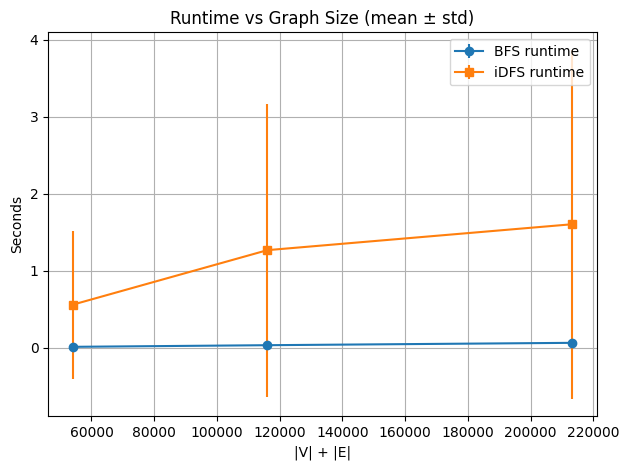

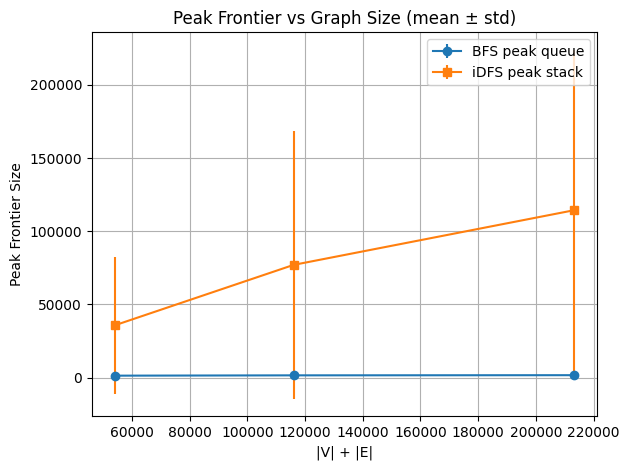

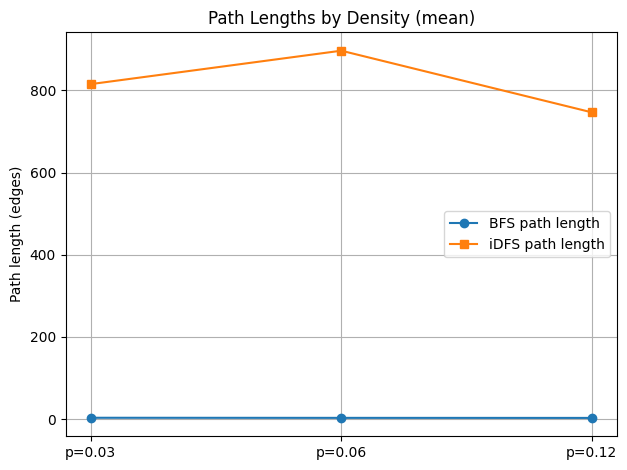

In [ ]:
### LAYER: DATA VISUALIZATION !!DO NOT RECONNNECT! (author: Alex Lu)
def _count_edges_from_graph(g):
    if hasattr(g, "edges"):
        return len(g.edges)
    adj = g.get_adj_list()        # fallback if edges aren't stored
    vals = adj.values() if isinstance(adj, dict) else adj
    return sum(len(v) for v in vals) // 2

def _measure_once(p):
    g = RUNGraph(p)

    t0 = time.perf_counter()
    bfs_path, bfs_peak = g.bfs()
    bfs_time = time.perf_counter() - t0

    t0 = time.perf_counter()
    idfs_path, idfs_peak = g.idfs()
    idfs_time = time.perf_counter() - t0

    n = g.num_nodes
    e = _count_edges_from_graph(g)

    return {
        "p": p,
        "n": n, "e": e, "size": n + e,
        "bfs_time": bfs_time, "idfs_time": idfs_time,
        "bfs_peak": bfs_peak, "idfs_peak": idfs_peak,
        "bfs_len": len(bfs_path), "idfs_len": len(idfs_path),
    }

# Run experiments
densities = [0.03, 0.06, 0.12]
trials_per_density = 8  # adjust for faster/slower runs

records = []
for p in densities:
    for _ in range(trials_per_density):
        records.append(_measure_once(p))

# Aggregate by density
by_p = defaultdict(lambda: defaultdict(list))
for r in records:
    for k, v in r.items():
        if k != "p":
            by_p[r["p"]][k].append(v)

# Helper for mean/std
def mstd(arr):
    a = np.array(arr, dtype=float)
    return a.mean(), (a.std(ddof=1) if len(a) > 1 else 0.0)

# Build per-density summaries
summary = []
for p in densities:
    S = by_p[p]
    size_mu, size_sd = mstd(S["size"])
    bfs_time_mu, bfs_time_sd = mstd(S["bfs_time"])
    idfs_time_mu, idfs_time_sd = mstd(S["idfs_time"])
    bfs_peak_mu, bfs_peak_sd = mstd(S["bfs_peak"])
    idfs_peak_mu, idfs_peak_sd = mstd(S["idfs_peak"])
    bfs_len_mu, bfs_len_sd = mstd(S["bfs_len"])
    idfs_len_mu, idfs_len_sd = mstd(S["idfs_len"])
    summary.append({
        "p": p,
        "size_mu": size_mu, "size_sd": size_sd,
        "bfs_time_mu": bfs_time_mu, "bfs_time_sd": bfs_time_sd,
        "idfs_time_mu": idfs_time_mu, "idfs_time_sd": idfs_time_sd,
        "bfs_peak_mu": bfs_peak_mu, "bfs_peak_sd": bfs_peak_sd,
        "idfs_peak_mu": idfs_peak_mu, "idfs_peak_sd": idfs_peak_sd,
        "bfs_len_mu": bfs_len_mu, "bfs_len_sd": bfs_len_sd,
        "idfs_len_mu": idfs_len_mu, "idfs_len_sd": idfs_len_sd,
    })

# Runtime vs size
plt.figure()
x = [s["size_mu"] for s in summary]
plt.errorbar(x, [s["bfs_time_mu"] for s in summary],
             yerr=[s["bfs_time_sd"] for s in summary],
             fmt='o-', label='BFS runtime')
plt.errorbar(x, [s["idfs_time_mu"] for s in summary],
             yerr=[s["idfs_time_sd"] for s in summary],
             fmt='s-', label='iDFS runtime')
plt.xlabel('|V| + |E|')
plt.ylabel('Seconds')
plt.title('Runtime vs Graph Size (mean ± std)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('runtime_vs_size.png', dpi=200)

# Peak frontier vs size
plt.figure()
plt.errorbar(x, [s["bfs_peak_mu"] for s in summary],
             yerr=[s["bfs_peak_sd"] for s in summary],
             fmt='o-', label='BFS peak queue')
plt.errorbar(x, [s["idfs_peak_mu"] for s in summary],
             yerr=[s["idfs_peak_sd"] for s in summary],
             fmt='s-', label='iDFS peak stack')
plt.xlabel('|V| + |E|')
plt.ylabel('Peak Frontier Size')
plt.title('Peak Frontier vs Graph Size (mean ± std)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('peak_frontier_vs_size.png', dpi=200)

# Path length comparison
plt.figure()
xpos = np.arange(len(densities))
plt.plot(xpos, [s["bfs_len_mu"] for s in summary], marker='o', label='BFS path length')
plt.plot(xpos, [s["idfs_len_mu"] for s in summary], marker='s', label='iDFS path length')
plt.xticks(xpos, [f"p={p}" for p in densities])
plt.ylabel('Path length (edges)')
plt.title('Path Lengths by Density (mean)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('path_lengths.png', dpi=200)

print("Saved PNGs: runtime_vs_size.png, peak_frontier_vs_size.png, path_lengths.png")



1. memory_profiler library not working as expected

Reference:

max_q = max(max_q, len(q))   # BFS

max_s = max(max_s, len(s))   # iDFS

Explanation:

Since memory_profiler isn't working as expected, space was measured using the active data structures themselves; the BFS queue and the DFS stack. For each run, the maximum queue or stack length was recorded. These values directly represents the memory footprint of each algorithm during the traversal, as they hold all active frontier nodes. When plotted against graph size, both BFS and iDFS showed mostly linear growth. Hence validating the expected O(n) space complexity.

2. Time library measured runtime instead of complexity. However appearing to be equal.

Reference:

start = time.perf_counter()

result = func()

end = time.perf_counter()

Explanation:

This gives the actual runtime in seconds. In order to combat that, we used

plt.plot(N, bfs_time)

plt.plot(N, idfs_time)

in the analysis code.

If the plots form near-linear lines then our runtime follows O(n + e) is validated.

The time library measures clock runtime and not asymptotic complexity. However, by collecting runtime data across multiple graph sizes, we observed a near linear relationship between the runtime and graph size (|V| + |E|) for both BFS and iDFS. This supports the theoretical time complexicity of O(n + e). While absolute runtime values may vary due to system load and randomness in edge generation, their growth pattern aligns with expected linear scaling.
